In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import nltk
import re
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize 
import html
#!pip install TextBlob
from textblob import TextBlob

In [2]:
test_df = pd.read_csv('drugsComTest_raw.tsv', sep = '\t')
train_df = pd.read_csv('drugsComTrain_raw.tsv', sep = '\t')

In [3]:
#Merging the two datasets 
frames = [test_df, train_df]
df = pd.concat(frames)


df.rename(columns={'Unnamed: 0':'uniqueid'}, inplace=True )
df.columns = df.columns.str.lower()

df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


# Removing NA Values

In [4]:
#Searching for NA values 
print("Missing Data Table")
df.isnull().sum()

Missing Data Table


uniqueid          0
drugname          0
condition      1194
review            0
rating            0
date              0
usefulcount       0
dtype: int64

In [5]:
size = df.shape[0]
condition_na = df['condition'].isnull().sum()

print(f'Percentage of NA values in conditions: {condition_na/size*100}%')

Percentage of NA values in conditions: 0.5551861547546533%


In [6]:
df = df.dropna()
print("Missing Value Table")
print(df.isnull().sum())
print()
print('New Data Shape:', df.shape)

Missing Value Table
uniqueid       0
drugname       0
condition      0
review         0
rating         0
date           0
usefulcount    0
dtype: int64

New Data Shape: (213869, 7)


# Sorting Dataset and Removing Duplicates

In [7]:
df.sort_values(['uniqueid'], ascending = True, inplace = True)
df.reset_index(drop = True, inplace = True)
df.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,"October 26, 2015",12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,"October 25, 2015",4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1.0,"October 24, 2015",3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5.0,"October 22, 2015",6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5.0,"October 21, 2015",2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2.0,"October 21, 2015",5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7.0,"October 20, 2015",2


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,uniqueid,rating,usefulcount
count,213869.000000,213869.000000,213869.000000
mean,116076.924786,6.991149,28.094118
std,67016.705794,3.275792,36.401377
min,0.000000,1.000000,0.000000
25%,58122.000000,5.000000,6.000000
50%,115972.000000,8.000000,16.000000
75%,174018.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


# Examining Conditions

In [10]:
#Conditions 
unique_conditions = df['condition'].unique()
unique_conditions.sort()
unique_conditions

array(['0</span> users found this comment helpful.',
       '100</span> users found this comment helpful.',
       '105</span> users found this comment helpful.',
       '10</span> users found this comment helpful.',
       '110</span> users found this comment helpful.',
       '11</span> users found this comment helpful.',
       '121</span> users found this comment helpful.',
       '123</span> users found this comment helpful.',
       '12</span> users found this comment helpful.',
       '135</span> users found this comment helpful.',
       '13</span> users found this comment helpful.',
       '142</span> users found this comment helpful.',
       '145</span> users found this comment helpful.',
       '146</span> users found this comment helpful.',
       '14</span> users found this comment helpful.',
       '15</span> users found this comment helpful.',
       '16</span> users found this comment helpful.',
       '17</span> users found this comment helpful.',
       '18</span> us

In [11]:
#There is incorrect conditions that contain 'users found this comment helpful.' and does not contain a condition 
df.loc[df['condition'].str.contains('users found this comment helpful.'), 'condition'] = None

In [12]:
print("Incorrect Html Tagged Conditions Table")
print(df.isnull().sum())

Incorrect Html Tagged Conditions Table
uniqueid          0
drugname          0
condition      1171
review            0
rating            0
date              0
usefulcount       0
dtype: int64


In [13]:
size = df.shape[0]
condition_na = df['condition'].isnull().sum()

print(f'Percentage of Corrupted values in conditions: {condition_na/size*100}%')

Percentage of Corrupted values in conditions: 0.5475314327929715%


In [14]:
df = df.dropna()
print("Missing Value Table")
print(df.isnull().sum())
print()
print('New Data Shape:', df.shape)

Missing Value Table
uniqueid       0
drugname       0
condition      0
review         0
rating         0
date           0
usefulcount    0
dtype: int64

New Data Shape: (212698, 7)


#  Polarity Lexicon Approach

<h3>TextBlob</h3>

In [15]:
from tqdm import tqdm

In [16]:
reviews = df["review"]
sentiments = []
subjectivity = []

for review in tqdm(reviews):
    blob = TextBlob(review)
    sentiments += [blob.sentiment.polarity]
    subjectivity += [blob.sentiment.subjectivity]

100%|██████████| 212698/212698 [05:50<00:00, 606.02it/s]


In [17]:
textblob_df = df.copy()

textblob_df["polarity"] = sentiments
textblob_df["subjectivity"] = subjectivity

In [18]:
textblob_df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount,polarity,subjectivity
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4,-0.287798,0.609524
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11,0.175357,0.485860
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7,-0.210000,0.767778
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,"October 26, 2015",12,-0.022500,0.617692
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,"October 25, 2015",4,0.044872,0.612968


In [19]:
np.corrcoef(df["rating"], textblob_df["polarity"])

array([[1.        , 0.34821039],
       [0.34821039, 1.        ]])

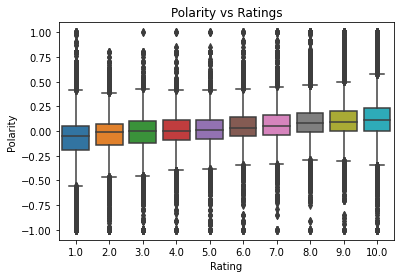

In [20]:
sns.boxplot(x=np.array(textblob_df["rating"]),y=np.array(textblob_df["polarity"]))
plt.xlabel("Rating")
plt.ylabel("Polarity")
plt.title("Polarity vs Ratings")
plt.show()

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'TextBlob Polarity Distribution')

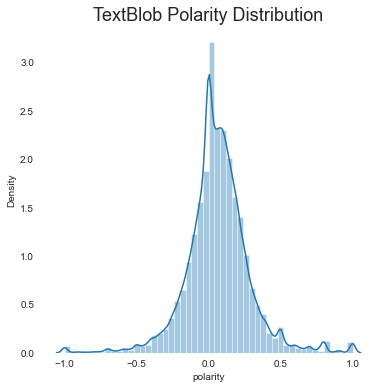

In [21]:
plt.figure(figsize=(6,6))
sns.set_style('white')
sns.distplot(textblob_df['polarity'])
plt.box(False)
plt.title("TextBlob Polarity Distribution", fontsize=18)

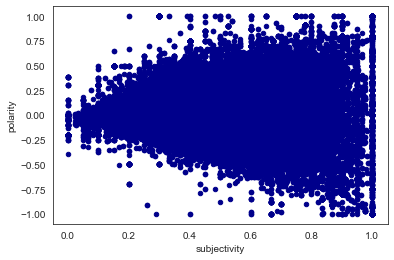

In [22]:
pol_sub = textblob_df.plot.scatter(x='subjectivity',
                     y='polarity',                       
                     c='DarkBlue')

In [25]:
#Creating Labels for Textblob Polarity score
#textblob_df['sentiment'] = pd.cut(textblob_df['polarity'], 2, labels = ['neg', 'pos'])

textblob_df.loc[(textblob_df['polarity'] > 0), 'sentiment'] = 1
textblob_df.loc[(textblob_df['polarity'] == 0 ), 'sentiment'] = 0
textblob_df.loc[(textblob_df['polarity'] < 0), 'sentiment'] = -1

In [26]:
textblob_df.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount,polarity,subjectivity,sentiment
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4,-0.287798,0.609524,-1
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11,0.175357,0.485860,1
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7,-0.210000,0.767778,-1
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,"October 26, 2015",12,-0.022500,0.617692,-1
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,"October 25, 2015",4,0.044872,0.612968,1
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1.0,"October 24, 2015",3,0.000321,0.608462,1
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5.0,"October 22, 2015",6,-0.056692,0.433712,-1
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5.0,"October 21, 2015",2,0.030995,0.414744,1
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2.0,"October 21, 2015",5,0.265309,0.484198,1
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7.0,"October 20, 2015",2,-0.047222,0.495833,-1


In [27]:
textblob_df['sentiment'].value_counts()

 1    132998
-1     70501
 0      9199
Name: sentiment, dtype: int64

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

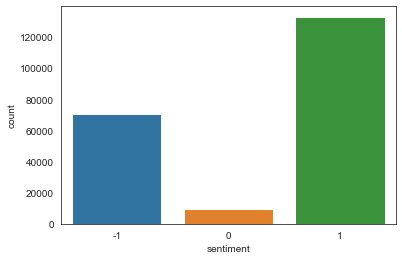

In [28]:
sns.countplot(textblob_df['sentiment'])

<h3>VADER</h3>

In [29]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vanes\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
vader_df = df.copy()

In [32]:
vader_df.head(3)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7


In [33]:
def encode_reviews(review):
    return html.unescape(review) # Decode in utf-8 and convert HTML characters

print("Review example: ", vader_df.loc[0, 'review']) # Example of review text

vader_df['review'] = vader_df['review'].apply(encode_reviews) # Let's clean the text...

vader_df.head(2)

Review example:  "Been on the depo injection since January 2015, had bleeding but it stopped after a while. When I had another injection in June, I didn&#039;t bleed for about a month. Started spotting mid-July and since approx. August 1st, I have been bleeding constantly, heavy enough to use pads and now it&#039;s almost November! I&#039;m sick of bleeding and forking out money for sanitary pads when I shouldn&#039;t be bleeding-well not as long as I have been now! Currently awaiting an ultrasound to see what is happening. I would like to change my contraceptive but my doctor won&#039;t let me :("


,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4
1,2,Medroxyprogesterone,Amenorrhea,"""I'm 21 years old and recently found out I mig...",10.0,"October 27, 2015",11


In [34]:
sid = SentimentIntensityAnalyzer() 

"""
Only run the bottom three lines if there is time. This step takes a few minutes
"""
#vader_df["neg_score"] = vader_df["review_clean"].apply(lambda x: sid.polarity_scores(x)["neg"])
#vader_df["neu_score"] = vader_df["review_clean"].apply(lambda x: sid.polarity_scores(x)["neu"])
#vader_df["pos_score"] = vader_df["review_clean"].apply(lambda x: sid.polarity_scores(x)["pos"])

vader_df["v_polarity"] = vader_df["review"].apply(lambda x: sid.polarity_scores(x)["compound"])

In [35]:
vader_df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount,v_polarity
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4,-0.5773
1,2,Medroxyprogesterone,Amenorrhea,"""I'm 21 years old and recently found out I mig...",10.0,"October 27, 2015",11,0.7650
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7,-0.6075
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,"October 26, 2015",12,-0.5997
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,"October 25, 2015",4,0.7263


In [36]:
np.corrcoef(vader_df["rating"], vader_df["v_polarity"])

array([[1.        , 0.33801901],
       [0.33801901, 1.        ]])

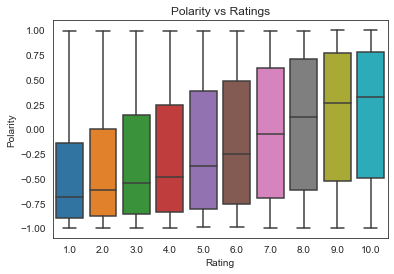

In [37]:
sns.boxplot(x=np.array(vader_df["rating"]),y=np.array(vader_df["v_polarity"]))
plt.xlabel("Rating")
plt.ylabel("Polarity")
plt.title("Polarity vs Ratings")
plt.show()

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'VADER Polarity Distribution')

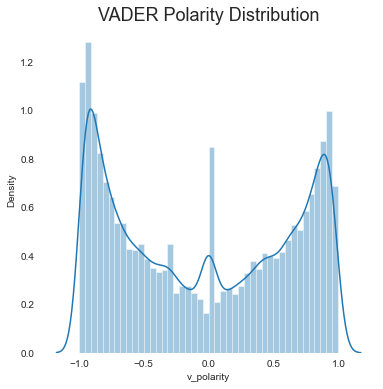

In [38]:
plt.figure(figsize=(6,6))
sns.set_style('white')
sns.distplot(vader_df['v_polarity'])
plt.box(False)
plt.title("VADER Polarity Distribution", fontsize=18)

In [39]:
#vader_df['sentiment'] = pd.cut(vader_df['v_polarity'], 2, labels = ['neg', 'pos'])

vader_df.loc[(vader_df['v_polarity'] > 0), 'sentiment'] = 1
vader_df.loc[(vader_df['v_polarity'] == 0), 'sentiment'] = 0
vader_df.loc[(vader_df['v_polarity'] < 0), 'sentiment'] = -1

In [41]:
vader_df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount,v_polarity,sentiment
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4,-0.5773,-1.0
1,2,Medroxyprogesterone,Amenorrhea,"""I'm 21 years old and recently found out I mig...",10.0,"October 27, 2015",11,0.7650,1.0
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7,-0.6075,-1.0
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,"October 26, 2015",12,-0.5997,-1.0
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,"October 25, 2015",4,0.7263,1.0


In [42]:
vader_df['sentiment'].value_counts()

-1.0    108292
 1.0     97785
 0.0      6621
Name: sentiment, dtype: int64

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

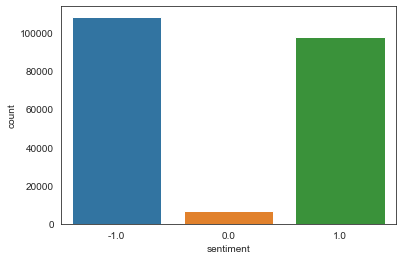

In [43]:
sns.countplot(vader_df['sentiment'])

<h3>Average Polarity (TextBlob and Vader)</h3>

In [44]:
avg_df = df.copy()

In [45]:
avg_df.head(2)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11


In [46]:
avg_df['tb_pol'] = textblob_df["polarity"]
avg_df['vd_pol'] = vader_df["v_polarity"]

In [47]:
avg_df['polarity'] = avg_df[['tb_pol', 'vd_pol']].mean(axis=1)

In [48]:
avg_df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount,tb_pol,vd_pol,polarity
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4,-0.287798,-0.5773,-0.432549
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11,0.175357,0.7650,0.470179
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7,-0.210000,-0.6075,-0.408750
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,"October 26, 2015",12,-0.022500,-0.5997,-0.311100
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,"October 25, 2015",4,0.044872,0.7263,0.385586


In [49]:
np.corrcoef(avg_df["rating"], avg_df["polarity"])

array([[1.        , 0.38425841],
       [0.38425841, 1.        ]])

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Polarity Distribution')

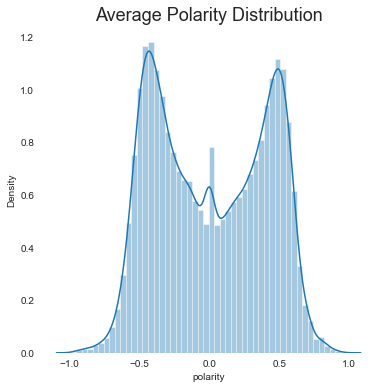

In [50]:
plt.figure(figsize=(6,6))
sns.set_style('white')
sns.distplot(avg_df['polarity'])
plt.box(False)
plt.title("Average Polarity Distribution", fontsize=18)

In [51]:
#avg_df['sentiment'] = pd.qcut(avg_df['polarity'], 2, labels = ['neg', 'pos'])

avg_df.loc[(avg_df['polarity'] > 0), 'sentiment'] = 1
avg_df.loc[(avg_df['polarity'] == 0), 'sentiment'] = 0
avg_df.loc[(avg_df['polarity'] < 0), 'sentiment'] = -1

In [53]:
avg_df.head(3)

,uniqueid,drugname,condition,review,rating,date,usefulcount,tb_pol,vd_pol,polarity,sentiment
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4,-0.287798,-0.5773,-0.432549,-1.0
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11,0.175357,0.7650,0.470179,1.0
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7,-0.210000,-0.6075,-0.408750,-1.0


In [54]:
avg_df['sentiment'].value_counts()

-1.0    106095
 1.0    104057
 0.0      2546
Name: sentiment, dtype: int64

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

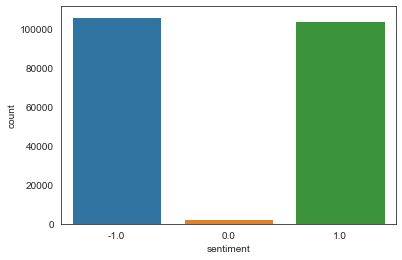

In [55]:
sns.countplot(avg_df['sentiment'])

In [ ]:
#https://medium.com/nerd-for-tech/sentiment-analysis-lexicon-models-vs-machine-learning-b6e3af8fe746
#https://www.analyticsvidhya.com/blog/2021/04/a-guide-to-feature-engineering-in-nlp/ 

#https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4 

##https://towardsdatascience.com/sentiment-classification-in-python-da31833da01b - this is the outline 

# Splitting the Data

In [56]:
df['tb_sentiment'] = textblob_df['sentiment']
df['vd_sentiment'] = vader_df['sentiment']
df['sentiment'] = avg_df['sentiment']

In [57]:
df.head(3)

,uniqueid,drugname,condition,review,rating,date,usefulcount,tb_sentiment,vd_sentiment,sentiment
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4,-1,-1.0,-1.0
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11,1,1.0,1.0
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7,-1,-1.0,-1.0


In [58]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=1)

In [59]:
print("Shape of Training Set:", train_df.shape)
print("Shape of Test Set:", test_df.shape)

Shape of Training Set: (148888, 10)
Shape of Test Set: (63810, 10)


<h3>Average</h3>

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

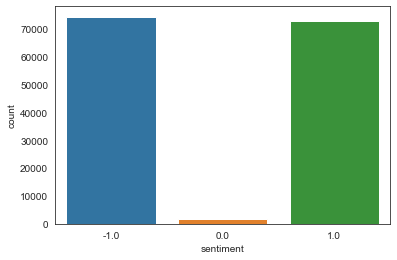

In [60]:
sns.countplot(train_df['sentiment'])

In [ ]:
#Section used of resapling - https://medium.com/@annabiancajones/sentiment-analysis-on-reviews-train-test-split-bootstrapping-cross-validation-word-clouds-4ae65e745f59

# Feature Engineering (N-Grams & TF-IDF)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

<h3>Unigram or BOW</h3>

In [101]:
vectorizer =CountVectorizer(analyzer='word', min_df = 0.0075)

bow_corpus = vectorizer.fit_transform(df['review']).astype(np.uint8)

bow_tdm = pd.DataFrame(bow_corpus.toarray(), columns=vectorizer.get_feature_names())
bow_tdm.index= df.index

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [103]:
bow_tdm.head(5)

,039,10,100,100mg,10mg,11,12,13,14,15,...,years,yeast,yes,yesterday,yet,you,your,yrs,zero,zoloft
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [104]:
bow_corpus.shape

(212698, 933)

In [105]:
from wordcloud import WordCloud

def wordcloud(data,title):
    wc = WordCloud(width=600, height=530, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()

NameError: name 'wrap' is not defined

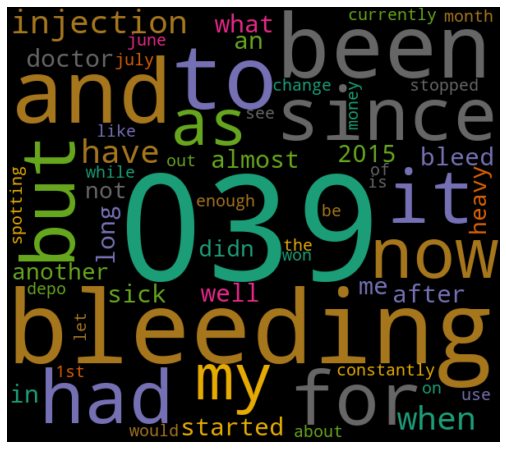

In [106]:
bow_tdm= bow_tdm.transpose()

for index,product in enumerate(bow_tdm.columns):
    wordcloud(bow_tdm[product].sort_values(ascending=False),product)

In [113]:
bow_tdm.head(3)

,0,1,2,3,4,5,6,7,8,9,...,213859,213860,213861,213862,213863,213864,213865,213866,213867,213868
039,5,4,0,0,1,2,5,2,5,7,...,0,2,3,4,4,1,0,0,3,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>TF_IDF</h3>

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0075) #was running into memory issues so min_df = 0.01 means ignoring terms that appear in less than 1% of the document
tfidf_corpus = tfidf_vectorizer.fit_transform(df['review_clean'])

In [216]:
tfidf_corpus.shape

(212698, 788)

In [217]:
tfidf_tdm = pd.DataFrame(tfidf_corpus.toarray(), columns=tfidf_vectorizer.get_feature_names())
tfidf_tdm.index= df.index

In [218]:
tfidf_tdm.head(5)

,able,absolutely,ache,acne,active,actually,add,added,adhd,affect,...,xanax,year,yeast,yes,yesterday,yet,youre,yr,zero,zoloft
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.143155,0.0,0.0,0.0,0.0,...,0.0,0.073205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.225690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.062327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.076676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


NameError: name 'wrap' is not defined

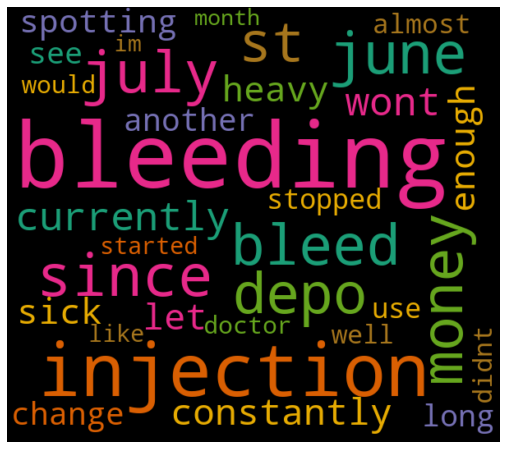

In [219]:
#Displaying the relevent words within the document 
tfidf_tdm= tfidf_tdm.transpose()

for index,product in enumerate(tfidf_tdm.columns):
    wordcloud(tfidf_tdm[product].sort_values(ascending=False),product)

# Count Vectorizing NB Model

In [66]:
v = CountVectorizer(analyzer='word')

In [68]:
reviews_corpus = v.fit_transform(df.review)
reviews_corpus.shape

(212698, 53386)

In [69]:
sentiment = df['sentiment']
sentiment.shape

(212698,)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.30,random_state=42)

print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (138253, 53386) (138253,)
Test data shape  (74445, 53386) (74445,)


In [72]:
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.metrics import confusion_matrix #import confusion_matrix

In [73]:
clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(pred, Y_test)) #print confusion matrix

Accuracy: 0.750715293169454
Confusion Matrix
[[27763   397  8409]
 [    1    14     2]
 [ 9232   517 28110]]


In [75]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.76      0.75      0.75     36996
         0.0       0.82      0.02      0.03       928
         1.0       0.74      0.77      0.76     36521

    accuracy                           0.75     74445
   macro avg       0.78      0.51      0.51     74445
weighted avg       0.75      0.75      0.75     74445



In [ ]:
#Bigram 

In [88]:
v = CountVectorizer(ngram_range = (2, 2), min_df = 0.00075)
bigram_corpus = v.fit_transform(df['review']).astype(np.uint8)

In [89]:
bigram_corpus.shape

(212698, 12774)

In [90]:
sentiment = df['sentiment']
sentiment.shape

(212698,)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(bigram_corpus,sentiment,test_size=0.30,random_state=42)

print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (138253, 12774) (138253,)
Test data shape  (74445, 12774) (74445,)


In [92]:
clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(pred, Y_test)) #print confusion matrix

Accuracy: 0.7235274363624152
Confusion Matrix
[[26666   391  9165]
 [  353   205   364]
 [ 9977   332 26992]]


In [93]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.74      0.72      0.73     36996
         0.0       0.22      0.22      0.22       928
         1.0       0.72      0.74      0.73     36521

    accuracy                           0.72     74445
   macro avg       0.56      0.56      0.56     74445
weighted avg       0.72      0.72      0.72     74445



# TF_IDF NB Model

In [94]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.corpus import words

from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(min_df = 0.00075)
x = v.fit_transform(df['review'])

In [95]:
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(df.review)
reviews_corpus.shape

(212698, 53386)

In [96]:
sentiment = df['sentiment']
sentiment.shape

(212698,)

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.30,random_state=42)

print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (142507, 53386) (142507,)
Test data shape  (70191, 53386) (70191,)


In [98]:
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.metrics import confusion_matrix #import confusion_matrix

In [99]:
clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(pred, Y_test)) #print confusion matrix

Accuracy: 0.7512501602769586
Confusion Matrix
[[27231   412  8973]
 [    0     0     0]
 [ 7614   461 25500]]


In [100]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.74      0.78      0.76     34845
         0.0       0.00      0.00      0.00       873
         1.0       0.76      0.74      0.75     34473

    accuracy                           0.75     70191
   macro avg       0.50      0.51      0.50     70191
weighted avg       0.74      0.75      0.75     70191



C:\Users\vanes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
